# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [5]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [6]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Dependents'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Property_Area'].value_counts())
print(df['Loan_Status'].value_counts())
print(df['Credit_History'].value_counts())

#Not nominal but bucketed
print(df['Loan_Amount_Term'].value_counts())


Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [7]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0})

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



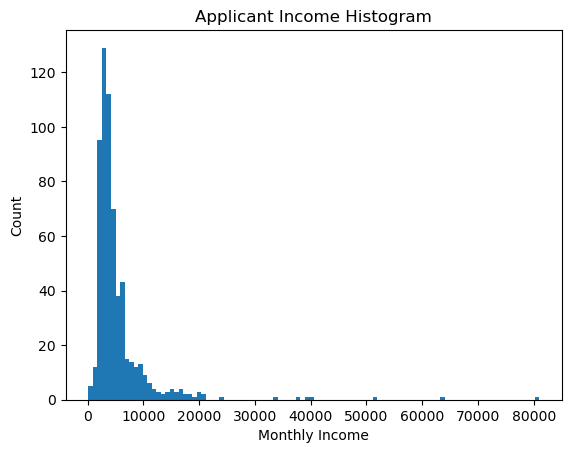

In [8]:
plt.hist(df['ApplicantIncome'],bins=100)
plt.title('Applicant Income Histogram')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

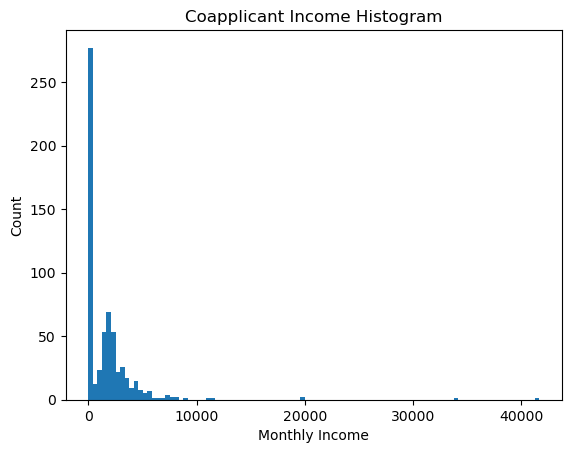

In [9]:
plt.hist(df['CoapplicantIncome'],bins=100)
plt.title('Coapplicant Income Histogram')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()


Look at box plots to understand the distributions. 

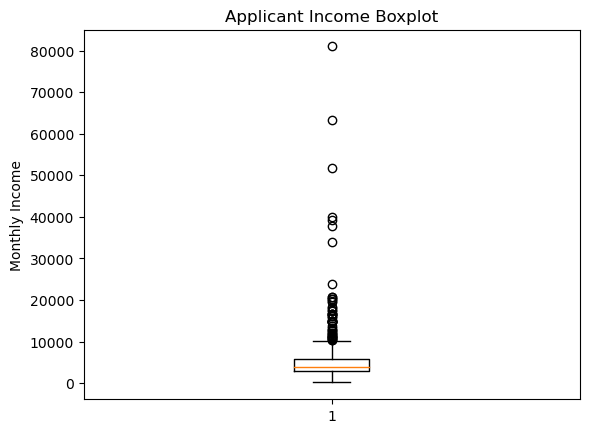

In [10]:
plt.boxplot(df['ApplicantIncome'])
plt.title('Applicant Income Boxplot')
plt.ylabel('Monthly Income')
plt.show()

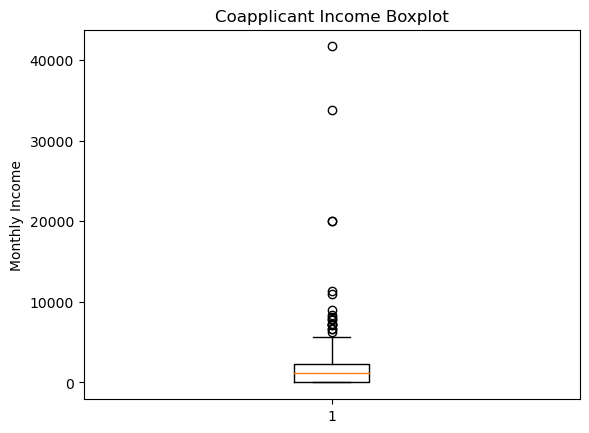

In [11]:
plt.boxplot(df['CoapplicantIncome'])
plt.title('Coapplicant Income Boxplot')
plt.ylabel('Monthly Income')
plt.show()

In [12]:
import seaborn as sns


Look at the distribution of income segregated  by `Education`

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

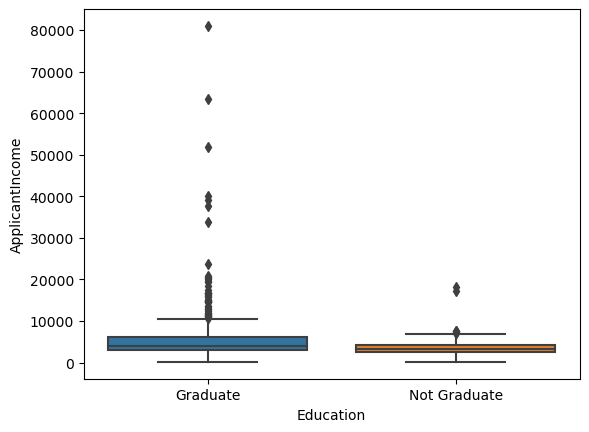

In [13]:
sns.boxplot(x = df['Education'],
            y = df['ApplicantIncome'])

Look at the histogram and boxplot of LoanAmount

<Axes: ylabel='LoanAmount'>

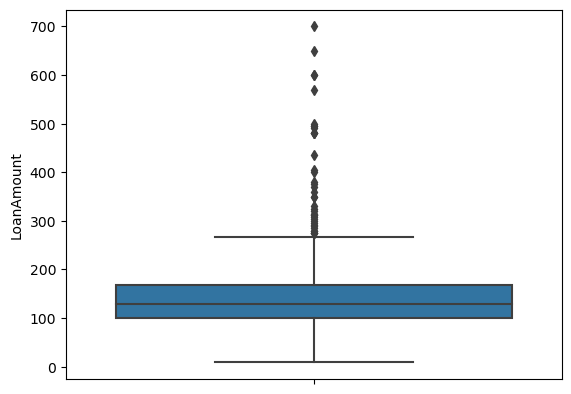

In [14]:
sns.boxplot(y = df['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

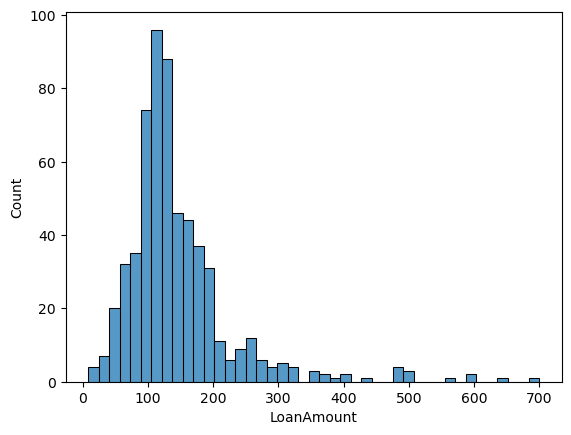

In [15]:
sns.histplot(df['LoanAmount'])

In [16]:
df.corr()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [17]:
#Differences between genders income when married
pd.DataFrame.pivot_table(df, values = 'ApplicantIncome', index=['Gender'], columns=['Married'], aggfunc=np.mean)

Married,No,Yes
Gender,,
Female,4503.787500,4829.645161
Male,5236.146154,5529.540616


In [18]:
#Differences between genders income based on # of dependents
pd.DataFrame.pivot_table(df, values = 'ApplicantIncome', index=['Gender'], columns=['Dependents'], aggfunc=np.mean)

Dependents,0,1,2,3+
Gender,,,,
Female,4278.100000,6487.894737,4277.857143,1776.333333
Male,5119.848837,5793.280488,5015.456522,7719.777778


<Axes: xlabel='Gender', ylabel='count'>

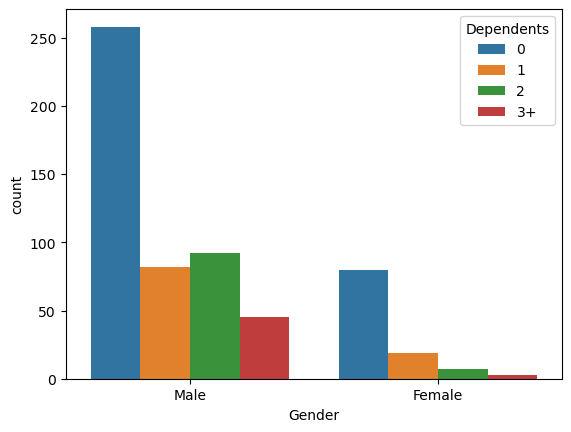

In [19]:
#Counts of above
sns.countplot(data=df, x='Gender',hue = 'Dependents')

In [20]:
#Difference in income by gender by education level
pd.DataFrame.pivot_table(df, values = 'ApplicantIncome', index=['Gender'], columns=['Education'], aggfunc=np.mean)

Education,Graduate,Not Graduate
Gender,,
Female,4646.467391,4629.700000
Male,5992.345745,3630.061947


<Axes: xlabel='Gender', ylabel='count'>

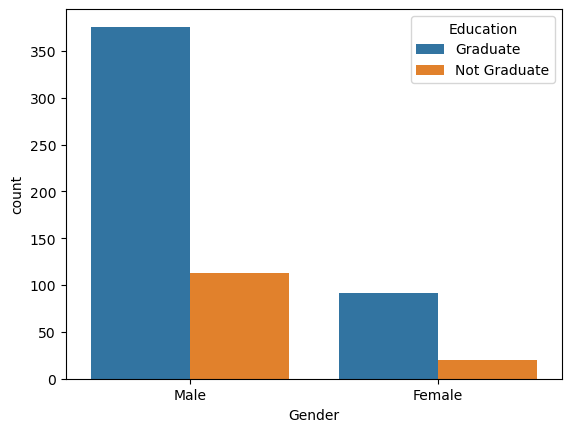

In [21]:
#Counts of above
sns.countplot(data=df, x='Gender',hue = 'Education')

In [22]:
#Difference in income for those self employed vs not
pd.DataFrame.pivot_table(df, values = 'ApplicantIncome', index=['Self_Employed'], aggfunc=np.mean)

,ApplicantIncome
Self_Employed,
No,5049.748000
Yes,7380.817073


In [23]:
#Difference in income by education level for those self employed vs not
pd.DataFrame.pivot_table(df, values = 'ApplicantIncome', index=['Self_Employed'], columns=['Education'], aggfunc=np.mean)

Education,Graduate,Not Graduate
Self_Employed,,
No,5504.203085,3457.108108
Yes,7735.507692,6024.647059


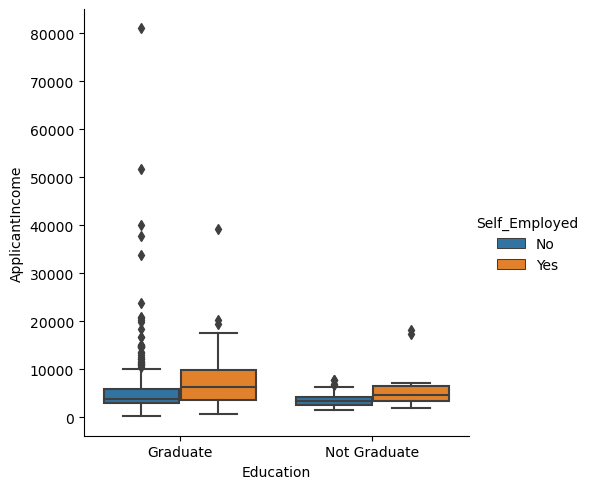

In [24]:
#boxplot of above
sns.catplot(data=df, x="Education", y="ApplicantIncome", hue = 'Self_Employed', kind='box')

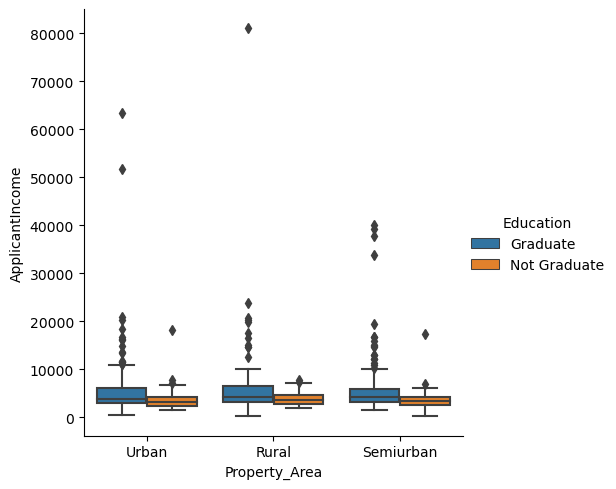

In [25]:
#Boxplot of property type by education
sns.catplot(data=df, x="Property_Area", y="ApplicantIncome", hue = 'Education', kind='box')

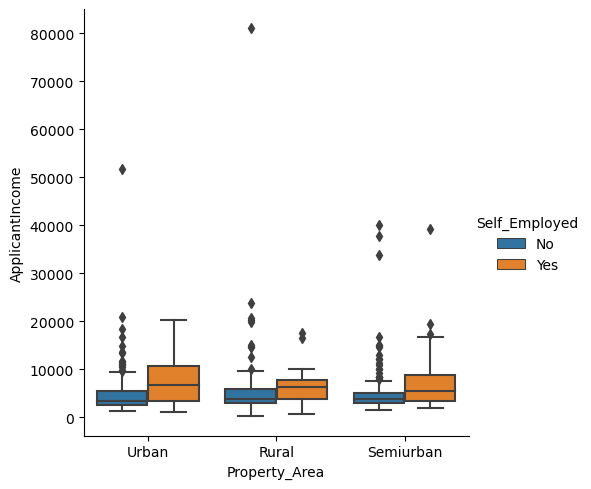

In [26]:
#boxplot of property type and employment 
sns.catplot(data=df, x="Property_Area", y="ApplicantIncome", hue = 'Self_Employed', kind='box')

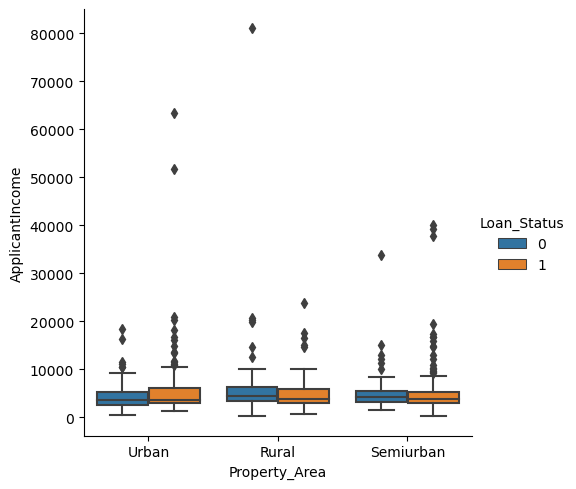

In [27]:
#boxplot of income and property area by loan status
sns.catplot(data=df, x="Property_Area", y="ApplicantIncome", hue = 'Loan_Status', kind='box')

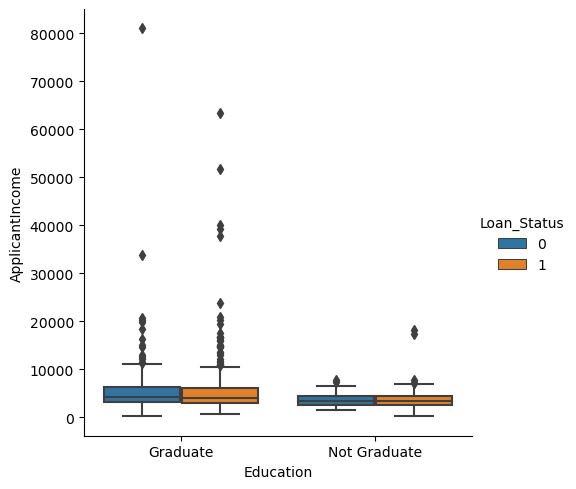

In [28]:
#Boxplot of education and income against loan_status
sns.catplot(data=df, x="Education", y="ApplicantIncome", hue = 'Loan_Status', kind='box')

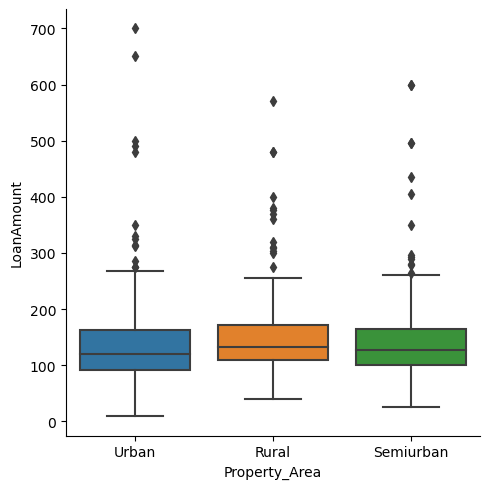

In [29]:
#boxplot of loan amount by property area
sns.catplot(data=df, x="Property_Area", y="LoanAmount", kind='box')

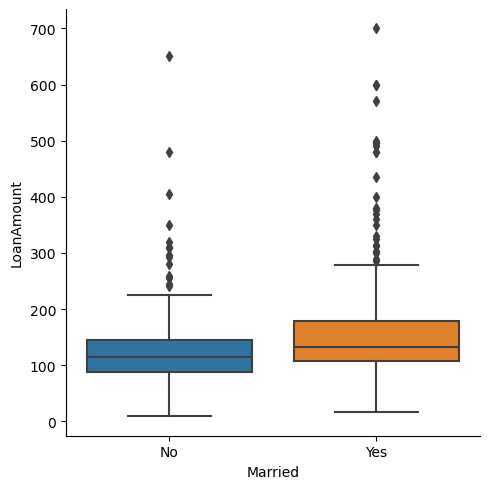

In [30]:
#boxplot of loan amount by married
sns.catplot(data=df, x="Married", y="LoanAmount", kind='box')

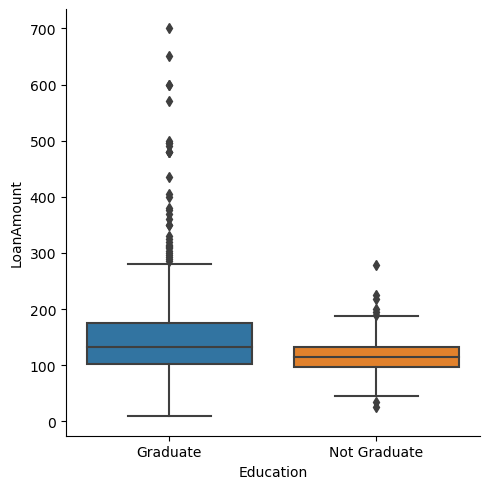

In [31]:
#boxplot of loan amount by married
sns.catplot(data=df, x="Education", y="LoanAmount", kind='box')

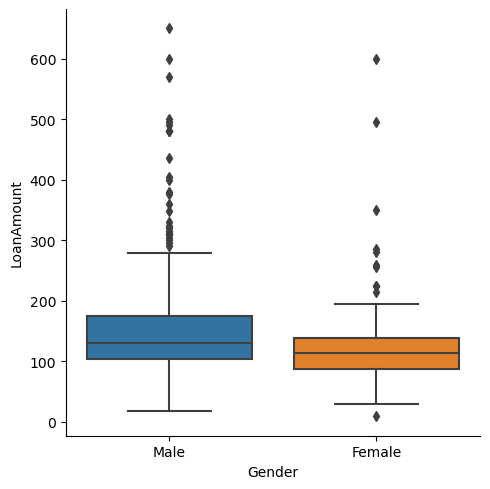

In [32]:
#boxplot of loan amount by married
sns.catplot(data=df, x="Gender", y="LoanAmount", kind='box')

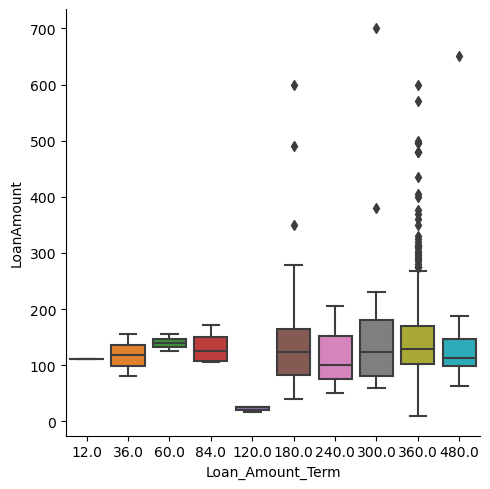

In [33]:
#boxplot of loan amount by loan amount term
sns.catplot(data=df, x="Loan_Amount_Term", y="LoanAmount", kind='box')

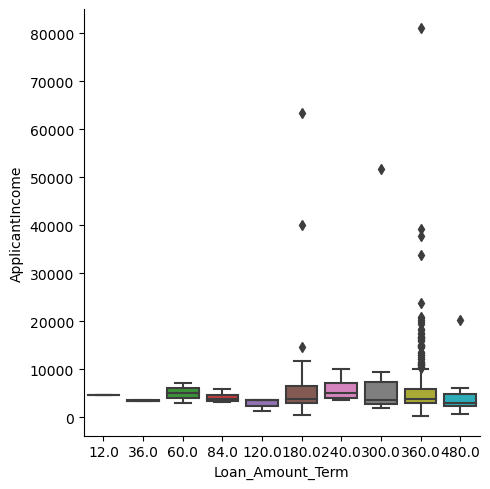

In [34]:
#boxplot of loan amount term by income
sns.catplot(data=df, x="Loan_Amount_Term", y="ApplicantIncome", kind='box')

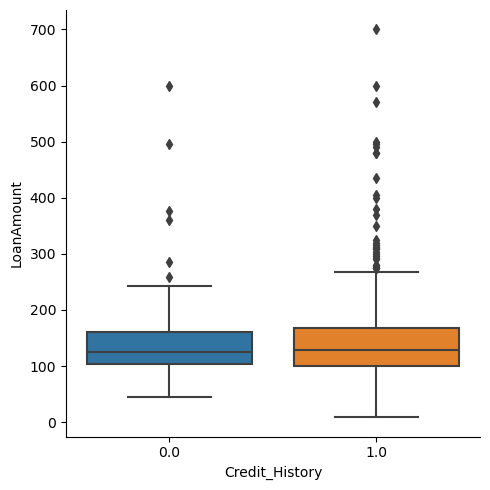

In [35]:
#boxplot of loan amount by married
sns.catplot(data=df, x="Credit_History", y="LoanAmount", kind='box')

In [36]:
#Differences between genders income when married
pd.DataFrame.pivot_table(df, values=['Loan_Status'], index=['Gender','Married'], aggfunc=np.mean)

Loan_Status
Gender Married             
Female No          0.637500
       Yes         0.741935
Male   No          0.623077
       Yes         0.717087

In [37]:
#Differences between genders income when married
pd.DataFrame.pivot_table(df, values=['Loan_Status'], index=['Education','Self_Employed'], aggfunc=np.mean)

Loan_Status
Education    Self_Employed             
Graduate     No                0.709512
             Yes               0.707692
Not Graduate No                0.603604
             Yes               0.588235

In [38]:
#Differences between genders income when married
pd.DataFrame.pivot_table(df, values=['Loan_Status'], index=['Property_Area'], aggfunc=np.mean)

,Loan_Status
Property_Area,
Rural,0.614525
Semiurban,0.768240
Urban,0.658416


In [39]:
#Differences between genders income when married
pd.DataFrame.pivot_table(df, values=['Loan_Status'], index=['Loan_Amount_Term'], aggfunc=np.mean)

,Loan_Status
Loan_Amount_Term,
12.0,1.000000
36.0,0.000000
60.0,1.000000
84.0,0.750000
120.0,1.000000
180.0,0.659091
240.0,0.750000
300.0,0.615385
360.0,0.701172


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [40]:
df = pd.read_csv("../data/data.csv") 

In [41]:
from sklearn.utils import shuffle

In [42]:
df=shuffle(df)

In [43]:
import imblearn.over_sampling as imblearn

oversample = imblearn.RandomOverSampler(sampling_strategy=.8)

In [44]:
X = df.drop(['Loan_Status','Loan_ID'],axis=1)
y = df['Loan_Status']
y = y.replace({'Y':1,'N':0})

In [45]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural
202,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban
433,Male,Yes,0,Graduate,No,2425,2340.0,143.0,360.0,1.0,Semiurban
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
142,Male,No,0,Graduate,Yes,6950,0.0,175.0,180.0,1.0,Semiurban


In [46]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [47]:
X, y = oversample.fit_resample(X,y)

In [48]:
y.value_counts()

1    422
0    337
Name: Loan_Status, dtype: int64

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

In [50]:
cat_impute = SimpleImputer(strategy = 'most_frequent') 

In [51]:
num_impute = ColumnTransformer(
[('imp_amount', SimpleImputer(strategy='mean'), [0]),
 #fill with log of 360, so we can do log transform before impute
 ('imp_term', SimpleImputer(strategy='constant', fill_value=2.556), [1]),
 ('imp_history', SimpleImputer(strategy='constant', fill_value=0), [2])],
remainder='passthrough')

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [52]:
def logtransform(X):
    X['LoanAmount'] = np.log(X['LoanAmount'])
    X['TotalIncome'] = np.log(X['ApplicantIncome']+X['CoapplicantIncome'])
    X = X.drop(columns = ['ApplicantIncome','CoapplicantIncome'])
    return X

In [53]:
num_log = FunctionTransformer(logtransform)

## 4. Building a Predictive Model

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [59]:
ohe = OneHotEncoder(sparse_output=False)
pca = PCA(n_components=3)

In [60]:
from sklearn.feature_selection import SelectKBest

In [61]:
selection = SelectKBest(k = 3)

In [62]:
def catFeat(X):
    cat_feats = X.dtypes[X.dtypes == 'object'].index.tolist()
    return X[cat_feats]

def numFeat(X):
    cat_feats = X.dtypes[X.dtypes == 'object'].index.tolist()
    num_feats = X.dtypes[~X.dtypes.index.isin(cat_feats)].index.tolist()
    return X[num_feats]

In [63]:
keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

In [64]:
cat_transform = Pipeline([('keep_cat',keep_cat),('cat_null',cat_impute),('onehot',ohe),('pca',pca)])
num_transform = Pipeline([('keep_num',keep_num),('log',num_log),('num_null',num_impute),('selection',selection)])

In [65]:
import xgboost
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, f1_score

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

selection = SelectKBest()

### XGBOOST MODEL ###

In [68]:
xgb = xgboost.XGBClassifier(n_estimators = 500)

In [69]:
cat_feats = X.dtypes[X.dtypes == 'object'].index.tolist()
num_feats = X.dtypes[~X.dtypes.index.isin(cat_feats)].index.tolist()

# model_preprocessing = ColumnTransformer([('numeric',num_transform,num_feats),('categorical',cat_transform,cat_feats)])
model_preprocessing = FeatureUnion([('cat_transform',cat_transform),('num_transform',num_transform)])

In [70]:
model = Pipeline([('preprocessing',model_preprocessing),('model',xgb)])

# param_grid = {"preprocessing__cat_transform__pca__n_components": [2, 3, 4],
#                   "preprocessing__num_transform__selection__k": [2, 3, 4],
#                   "model__max_depth":[4, 6, 8, 10],
#                   "model__min_child_weight":[1,3,5],
#                   "model__n_estimators":[500,750,1000],
#                   "model__reg_lambda":[0,.1,1,3,5],
#                   "model__reg_alpha":[0,.1,1,3,5],
#                   "model__learning_rate":[.2,.3,.5]
#              }

param_grid = {"preprocessing__cat_transform__pca__n_components": [2],
                  "preprocessing__num_transform__selection__k": [4],
                  "model__max_depth":[8],
                  "model__min_child_weight":[1],
                  "model__n_estimators":[750],
                  "model__reg_lambda":[3],
                  "model__reg_alpha":[0],
                  "model__learning_rate":[.3]
             }

grid_search_xgb = RandomizedSearchCV(model,param_grid,cv=5,n_iter=1,random_state=13,verbose=10,refit=True,n_jobs=-1)

grid_search_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LoanAmount'] = np.log(X['LoanAmount'])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalIncome'] = np.log(X['ApplicantIncome']+X['CoapplicantIncome'])


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              FeatureUnion(transformer_list=[('cat_transform',
                                                                              Pipeline(steps=[('keep_cat',
                                                                                               FunctionTransformer(func=<function catFeat at 0x0000026E402569E0>)),
                                                                                              ('cat_null',
                                                                                               SimpleImputer(strategy='most_frequent')),
                                                                                              ('onehot',
                                                                                               OneHotEncoder(sparse_output=False)),
                                                                                              ('pca',
                                                                                               PCA(n_components=3))])),
                                                                             ('num_transf...
                                                            random_state=None, ...))]),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.3],
                                        'model__max_depth': [8],
                                        'model__min_child_weight': [1],
                                        'model__n_estimators': [750],
                                        'model__reg_alpha': [0],
                                        'model__reg_lambda': [3],
                                        'preprocessing__cat_transform__pca__n_components': [2],
                                        'preprocessing__num_transform__selection__k': [4]},
                   random_state=13, verbose=10)

In [71]:
grid_search_xgb.best_params_

{'preprocessing__num_transform__selection__k': 4,
 'preprocessing__cat_transform__pca__n_components': 2,
 'model__reg_lambda': 3,
 'model__reg_alpha': 0,
 'model__n_estimators': 750,
 'model__min_child_weight': 1,
 'model__max_depth': 8,
 'model__learning_rate': 0.3}

In [72]:
y_pred = grid_search_xgb.predict(X_test)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LoanAmount'] = np.log(X['LoanAmount'])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalIncome'] = np.log(X['ApplicantIncome']+X['CoapplicantIncome'])


Try paramater grid search to improve the results

In [73]:
#Accuracy of initial model
grid_search_xgb.score(X_test,y_test)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LoanAmount'] = np.log(X['LoanAmount'])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalIncome'] = np.log(X['ApplicantIncome']+X['CoapplicantIncome'])


0.8

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

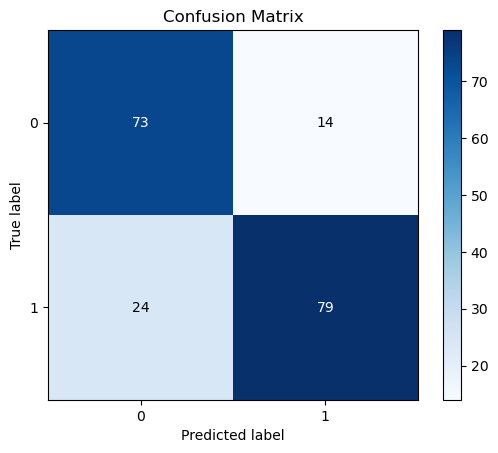

In [74]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test,y_pred)

### RANDOM FOREST MODEL ###

In [75]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 500)

In [76]:
model2 = Pipeline([('preprocessing',model_preprocessing),('model',random_forest)])

# param_grid = {"preprocessing__cat_transform__pca__n_components": [2, 3, 4],
#                   "preprocessing__num_transform__selection__k": [2, 3, 4],
#                   "model__max_depth":[4, 6, 8, 10, 12],
#                   "model__n_estimators":[250,500,750,1000,2000],
#                   "model__bootstrap":[True,False],
#                   "model__min_samples_leaf":[1,2,5],
#                   "model__class_weight":[None,'balanced']
#              }

param_grid = {"preprocessing__cat_transform__pca__n_components": [2],
                   "preprocessing__num_transform__selection__k": [4],
                   "model__max_depth":[12],
                   "model__n_estimators":[250],
                   "model__bootstrap":[True],
                   "model__min_samples_leaf":[1],
                   "model__class_weight":[None]
              }

grid_search = RandomizedSearchCV(model2,param_grid,cv=5,n_iter=1000,random_state=13,verbose=10,refit=True,n_jobs=-1)

grid_search.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=1000. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LoanAmount'] = np.log(X['LoanAmount'])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalIncome'] = np.log(X['ApplicantIncome']+X['CoapplicantIncome'])


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              FeatureUnion(transformer_list=[('cat_transform',
                                                                              Pipeline(steps=[('keep_cat',
                                                                                               FunctionTransformer(func=<function catFeat at 0x0000026E402569E0>)),
                                                                                              ('cat_null',
                                                                                               SimpleImputer(strategy='most_frequent')),
                                                                                              ('onehot',
                                                                                               OneHotEncoder(sparse_output=False)),
                                                                                              ('pca',
                                                                                               PCA(n_components=3))])),
                                                                             ('num_transf...
                                              RandomForestClassifier(n_estimators=500))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'model__bootstrap': [True],
                                        'model__class_weight': [None],
                                        'model__max_depth': [12],
                                        'model__min_samples_leaf': [1],
                                        'model__n_estimators': [250],
                                        'preprocessing__cat_transform__pca__n_components': [2],
                                        'preprocessing__num_transform__selection__k': [4]},
                   random_state=13, verbose=10)

In [77]:
grid_search.best_params_

{'preprocessing__num_transform__selection__k': 4,
 'preprocessing__cat_transform__pca__n_components': 2,
 'model__n_estimators': 250,
 'model__min_samples_leaf': 1,
 'model__max_depth': 12,
 'model__class_weight': None,
 'model__bootstrap': True}

In [78]:
#Accuracy of initial model
grid_search.score(X_test,y_test)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LoanAmount'] = np.log(X['LoanAmount'])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalIncome'] = np.log(X['ApplicantIncome']+X['CoapplicantIncome'])


0.7789473684210526

In [79]:
y_pred2 = grid_search.predict(X_test)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LoanAmount'] = np.log(X['LoanAmount'])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_3332\3173176535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalIncome'] = np.log(X['ApplicantIncome']+X['CoapplicantIncome'])


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

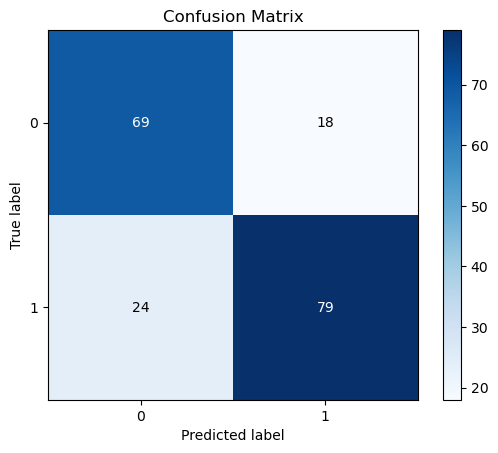

In [80]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test,y_pred2)

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [82]:
#Pipelined above

In [84]:
import pickle

In [ ]:
#used randomforest as AWS would not install XGBoost and given time crunch loss of predictiveness deemed acceptable

In [85]:
pickle.dump(grid_search, open( "model.p", "wb" ) )

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
# import Flask and jsonify
from flask import Flask, jsonify, request
# import Resource, Api and reqparser
from flask_restful import Resource, Api, reqparse
import pandas as pd
import numpy
import pickle

app = Flask(__name__)
api = Api(app)

class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass


    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
model = pickle.load( open( "../model/model.p", "rb" ) )

class Prediction(Resource):
    def post(self):
        json_data = request.get_json()
        df = pd.DataFrame(json_data.values(), index=json_data.keys()).transpose()
        # getting predictions from our model.
        # it is much simpler because we used pipelines during development
        res = model.predict_proba(df)
        # we cannot send numpt array as a result
        return res.tolist() 
    
# assign endpoint
api.add_resource(Prediction, '/prediction')

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)